In [86]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, classification_report

%matplotlib inline

In [87]:

data = pd.read_csv('/Users/check4068/Desktop/Product Sense/1.Conversion/conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [88]:
data.count


<bound method DataFrame.count of        country  age  new_user  source  total_pages_visited  converted
0           UK   25         1     Ads                    1          0
1           US   23         1     Seo                    5          0
2           US   28         1     Seo                    4          0
3        China   39         1     Seo                    5          0
4           US   30         1     Seo                    6          0
...        ...  ...       ...     ...                  ...        ...
316195      US   26         1     Ads                    9          0
316196      US   27         1  Direct                    6          0
316197   China   25         0     Ads                    4          0
316198      US   22         0     Seo                    4          0
316199      UK   24         0     Ads                    4          0

[316200 rows x 6 columns]>

In [89]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [90]:
data[data['age'] > 90]
data = data[data['age'] < 100]

<function matplotlib.pyplot.show(*args, **kw)>

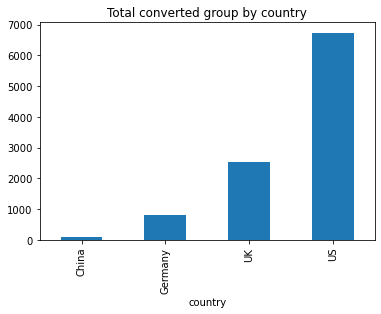

In [91]:
a=data.groupby('country')['converted'].sum()
a.plot.bar()
plt.title('Total converted group by country')
plt.show

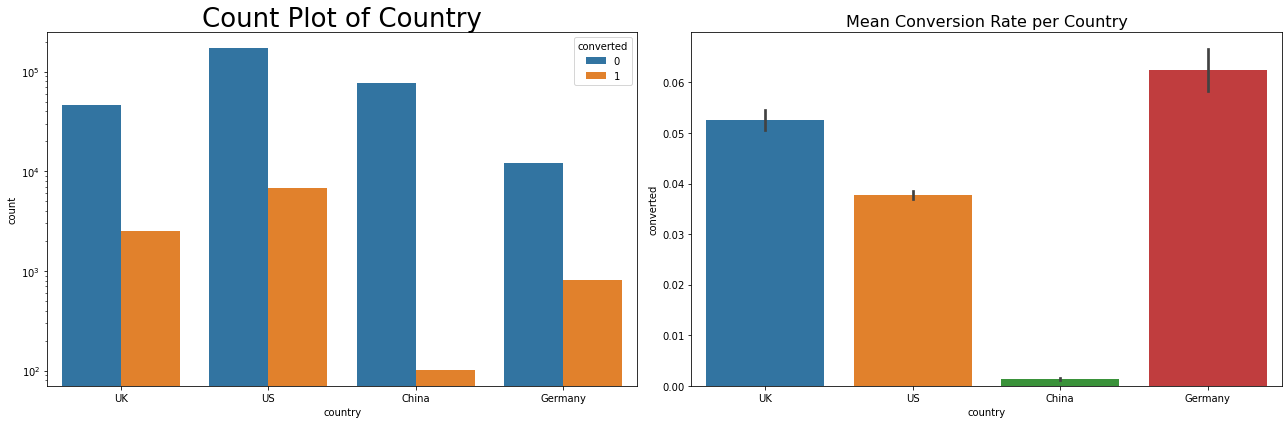

In [92]:
#中国转化率特低
grouped = data[['country', 'converted']].groupby('country').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=26)
ax[0].set_yscale('log')
sns.barplot(x='country', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
plt.tight_layout()
plt.show()

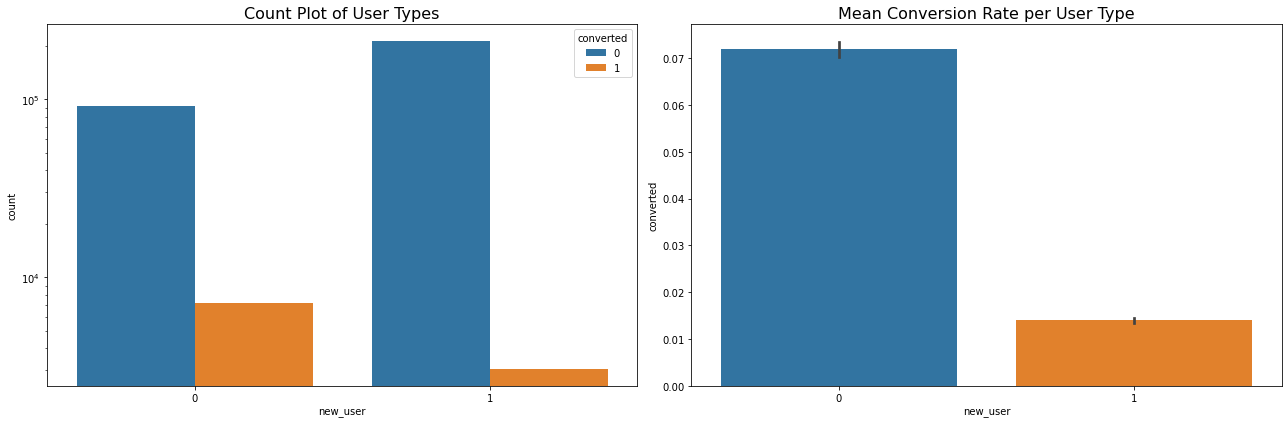

In [94]:

grouped = data[['new_user', 'converted']].groupby('new_user').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='new_user', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per User Type', fontsize=16)
plt.tight_layout()
plt.show()



Conversion rate is higher for old users!

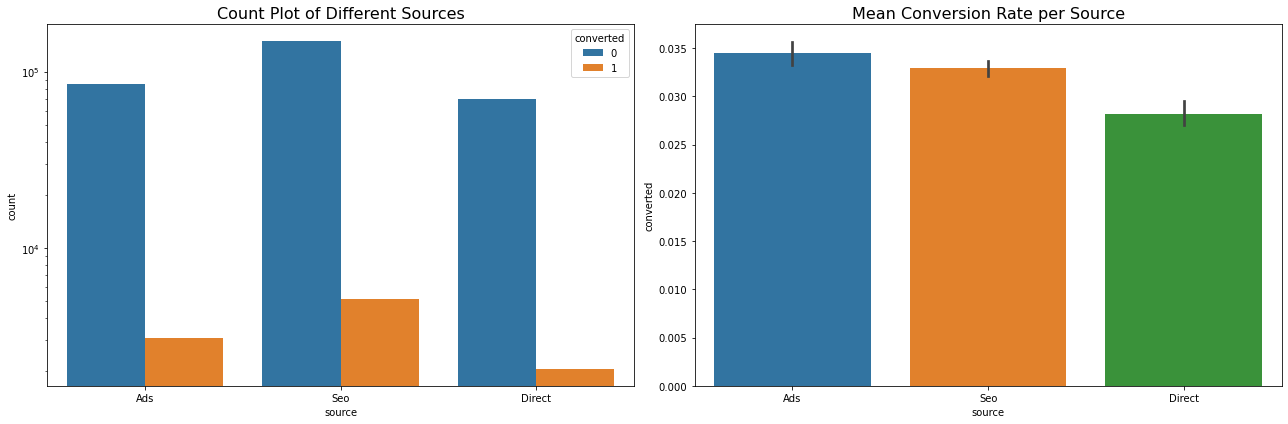

In [80]:
grouped = data[['source', 'converted']].groupby('source').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Different Sources', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='source', y='converted', data=data, ax=ax[1]);
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()


Conversion rate are alomst same for each SEO source

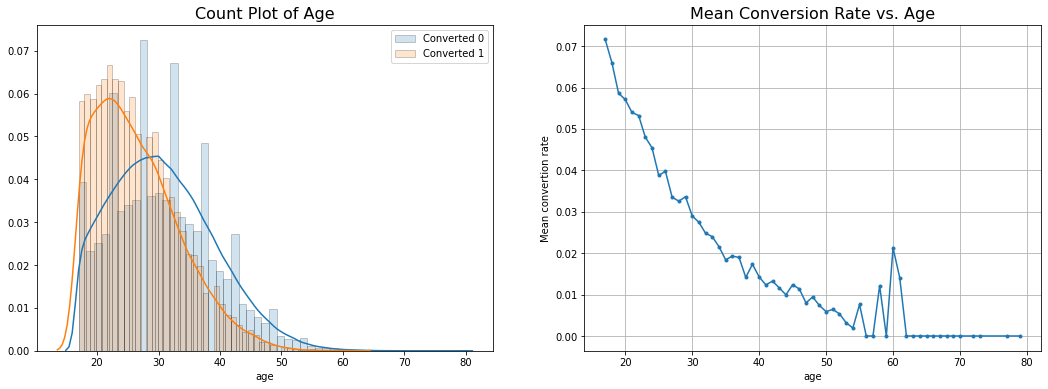

In [95]:
grouped = data[['age', 'converted']].groupby('age').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data[data['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

Conversion rate is lower when the user is older. 
There are most users at the age of 20-40

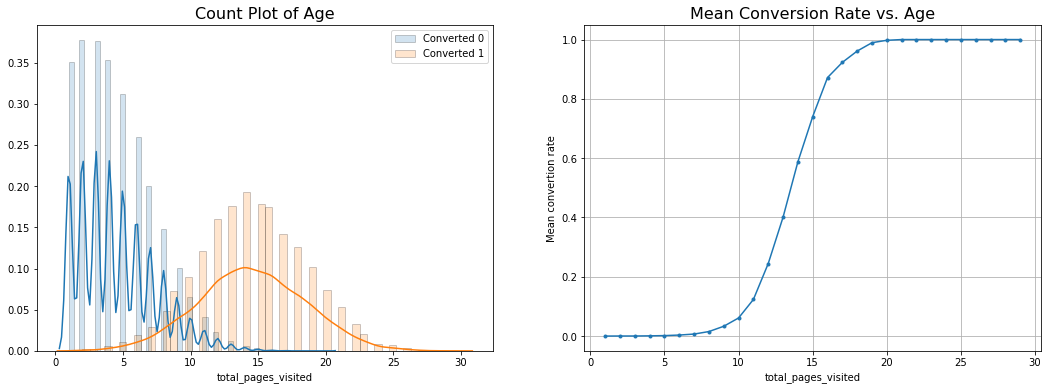

In [96]:
grouped = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data[data['converted'] == 0]['total_pages_visited'], label='Converted 0', 
             ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['total_pages_visited'], label='Converted 1', 
             ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()
ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)
plt.show()

The conversion rate is higher when user visited more pages

In [97]:
x=pd.get_dummies(data['country'],prefix='country')
data=pd.concat([data,x],axis=1)
y=pd.get_dummies(data['source'],prefix='source')
data=pd.concat([data,y],axis=1)
del data['country']
del data['source']

In [42]:
data

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0
316196,27,1,6,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
316197,25,0,4,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
316198,22,0,4,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

X = data[['age','new_user','total_pages_visited','country_China','country_Germany','country_UK','country_US','source_Ads','source_Direct','source_Seo']]
y = data['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)
X_train.shape, X_test.shape

from sklearn.ensemble import RandomForestClassifier
#随机森林
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Training set score: {:.2f}".format(rfc.score(X_train, y_train)))
print("Testing set score: {:.2f}".format(rfc.score(X_test, y_test)))

Training set score: 0.99
Testing set score: 0.98


AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

In [58]:
test_pred = rfc.predict(X_test)
test_fpr, test_tpr, _ = roc_curve(y_test, test_pred)

In [59]:
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

In [60]:
# Classification report
print(classification_report(y_true=y_test, y_pred=(test_pred > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     76500
           1       0.81      0.67      0.73      2550

    accuracy                           0.98     79050
   macro avg       0.90      0.83      0.86     79050
weighted avg       0.98      0.98      0.98     79050



In [61]:
confusion_matrix(y_train, train_pred)

array([[228770,    730],
       [  2089,   5559]])

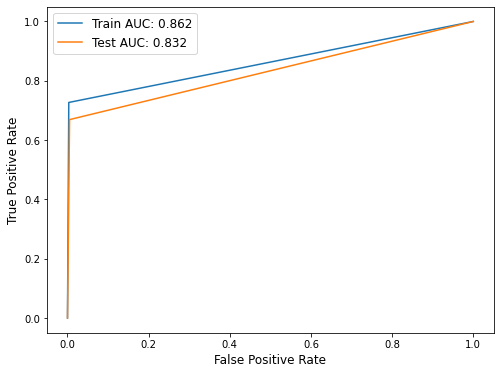

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

In [168]:
data

,country,age,new_user,source,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,UK,25,1,Ads,1,0,0,0,1,0,0,0,1,0,1,0,0
1,US,23,1,Seo,5,0,0,0,0,1,0,0,0,1,0,0,1
2,US,28,1,Seo,4,0,0,0,0,1,0,0,0,1,0,0,1
3,China,39,1,Seo,5,0,1,0,0,0,1,0,0,0,0,0,1
4,US,30,1,Seo,6,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0,0,0,0,1,0,0,0,1,1,0,0
316196,US,27,1,Direct,6,0,0,0,0,1,0,0,0,1,0,1,0
316197,China,25,0,Ads,4,0,1,0,0,0,1,0,0,0,1,0,0
316198,US,22,0,Seo,4,0,0,0,0,1,0,0,0,1,0,0,1


1.
Conversion among China users are very bad. from inspection, we know that there are lot of users coming from China, 
but their conversion rate is very low. Consider China's economic and population, 
there is a huge opportunity if we target Chinese users and improve their conversion rate. 
we should consider whether our website has good Chinese translation and satisfy Chinese users' culture requirement.

2.
Conversion from Germany is good. but there isn't a lot of users from German. 
So it's a huge opportuntity for us to target German users. for example, put more advertisement in German.

3.
Old users have better conversion rate. we should keep touch with them, 
for example, send promotion email or coupons to old users.

4.
Age is a negative factor. the older the user is, the less likely he/she will convert. 
then we should figure out why young people loves the web pages and strengthen it. 
and also find out why older people doesn't like our web pages, and try to correct it.

5.
Total_pages_visited is a positive factor. the longer the user browse our web page, 
the more likely he/she will convert and buy something. then if we find some user browse a lot and didn't buy anything, 
we can send email to remaind them.
